## Hotel Booking Data Preprocessing

-by Qi Sun

***

### Introduction:

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Assume these two hotels are run by the same company. I was asked to summarize and report  the hotel performance. Therefore, the purpose of this project is to compare the booking information between the city hotel and the resort hotel. 


**Variables:**

There are 32 variables in the original dataset.


In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

***
## Step 1: Load data from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset. 


In [3]:
# read the data from Github
df = pd.read_csv('https://raw.githubusercontent.com/susan-qisun/hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
# To display the bottom 5 rows
df.tail() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07



###  Description of data:


1. `.shape` returns the number of rows by the number of columns for the dataset. In this case, the output is (119390, 32), meaning the dataset has 119390 rows and 32 columns.

In [4]:
# check the shape for the dataframe
df.shape

(119390, 32)

2. `.nunique(axis=0)` returns the number of unique values for each variable.


In [17]:
# unique value
df.nunique(axis=0)

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

3. `.info()` prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

From the results below, we see that there are some columns having missing values. 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

4. **Numeric variables**: `.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

From the results below, the data types of some columns need to be changes. There are some variables having outliers.

In [67]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


5. **Categorical variables**: `.describe(include=[object])` count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.


In [66]:
df.describe(include=[object]).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


6. **The total hotel numbers by hotel type**: 

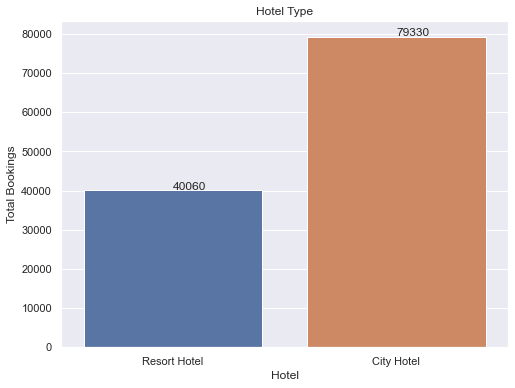

In [169]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="hotel", data = df)
plt.title('Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Total Bookings')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100))


In this dataset, there are a total of 79330 city hotels and 40060 resort hotels.

***
## Step 2: Data transformation



### 2.1 Missing value

#### a) Check missing or null values:


In [83]:
#Identify the Data Types
df_missing = pd.DataFrame(df.dtypes,columns=['Dtype'])
#Identify the unique values
df_missing['Nunique'] = df.nunique()
#check missing values for each column
df_missing['MissingValues']=df.isnull().sum()
#check percentage of missing values for each column
df_missing['percentage_missing_values'] = round(df.isnull().sum()*100/len(df),2)
#sort by the total number of missing values
df_missing = df_missing.sort_values('MissingValues',ascending = False)

df_missing

,Dtype,Nunique,MissingValues,percentage_missing_values
company,float64,352,112593,94.31
agent,float64,333,16340,13.69
country,object,177,488,0.41
children,float64,5,4,0.00
reserved_room_type,object,10,0,0.00
assigned_room_type,object,12,0,0.00
booking_changes,int64,21,0,0.00
deposit_type,object,3,0,0.00
hotel,object,2,0,0.00
previous_cancellations,int64,15,0,0.00


**Findings:**

From the results above, there are four columns having missing values. 94% of the country column are missing values. 14% of agent are missing. Since company and agent cannot be imputed or replaced, I'll remove these two columns from the dataset.

For the column of country, 0.41% are missing. I'll use 'Undeclared' to replace the missing values.

There are 4 missing values in children column. I would say those customers do not have any children.

#### b) Handle missing values


In [95]:
df02 = df.copy()

# delete columns of agent and company
df03 = df02.drop(['agent','company'],axis=1)


In [96]:
# replace missing children with 0
df03['children'] = df03['children'].fillna(0)


In [98]:
# fill missing values of country with 'Undeclared'
df03['country'] = df03['country'].replace(np.nan, 'Undeclared')


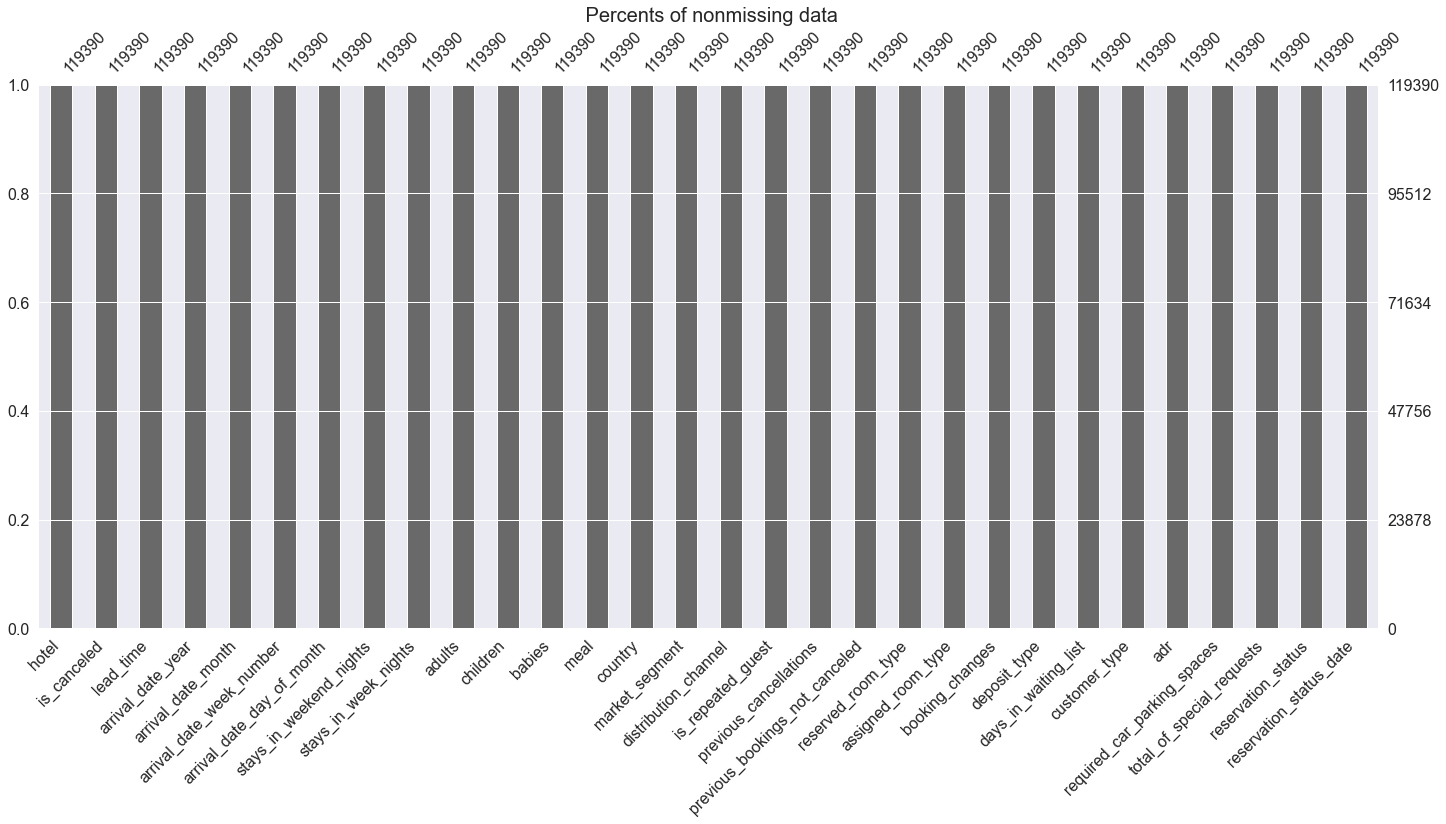

In [100]:
# Visualize nonmissing data
import missingno as msno 

# create the bar charts to show percents of nonmissing data
msno.bar(df03)
plt.title(' Percents of nonmissing data',fontsize=20);

From the plot above, there's no missing value in the dataset now.


### 2.2 Handle date columns

#### a) Merge arrival date columns 

I'll create a 'Arrival_Date' column that is the combination of three existing columns (arrival_date_year, arrival_date_day_of_month, and arrival_date_day_of_month).


In [107]:
df04 = df03.copy()
# convert datatypes to string
df04['arrival_date_year'] = df04['arrival_date_year'].astype('str')
df04['arrival_date_day_of_month'] = df04['arrival_date_day_of_month'].astype('str')
df04['Arrival_Date'] = df04['arrival_date_day_of_month'] + '-' + df04['arrival_date_month'] + '-' + df04['arrival_date_year']


#### b) Convert the datatype of arrival date to datetime

In [ ]:
# convert arrival date to datetime
df04['Arrival_Date'] = pd.to_datetime(df04['Arrival_Date'], errors='coerce')


#### c) Convert the datatype of 'reservation_status_date' to datetime

In [109]:
# convert reservation_status_date to datetime
df04['reservation_status_date'] = pd.to_datetime(df04['reservation_status_date'], errors='coerce')


### 2.3 Drop irrelevant columns

Since I just created the 'arrival_date' column, I'll drop arrival_date_year, arrival_date_day_of_month, and arrival_date_day_of_month columns from the dataset.

In [170]:
df05 = df04.copy()

df05 = df05.drop(['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_month'],
             axis=1)


### 2.4 Outliers

#### a) Detect outliers:

Among all numerical variables, the values of 'is_canceled' are 0 and 1, so it should be a categorical variable. I'll convert it later.

I'll use boxplot to detect the outliers of the numerical variables on this step.


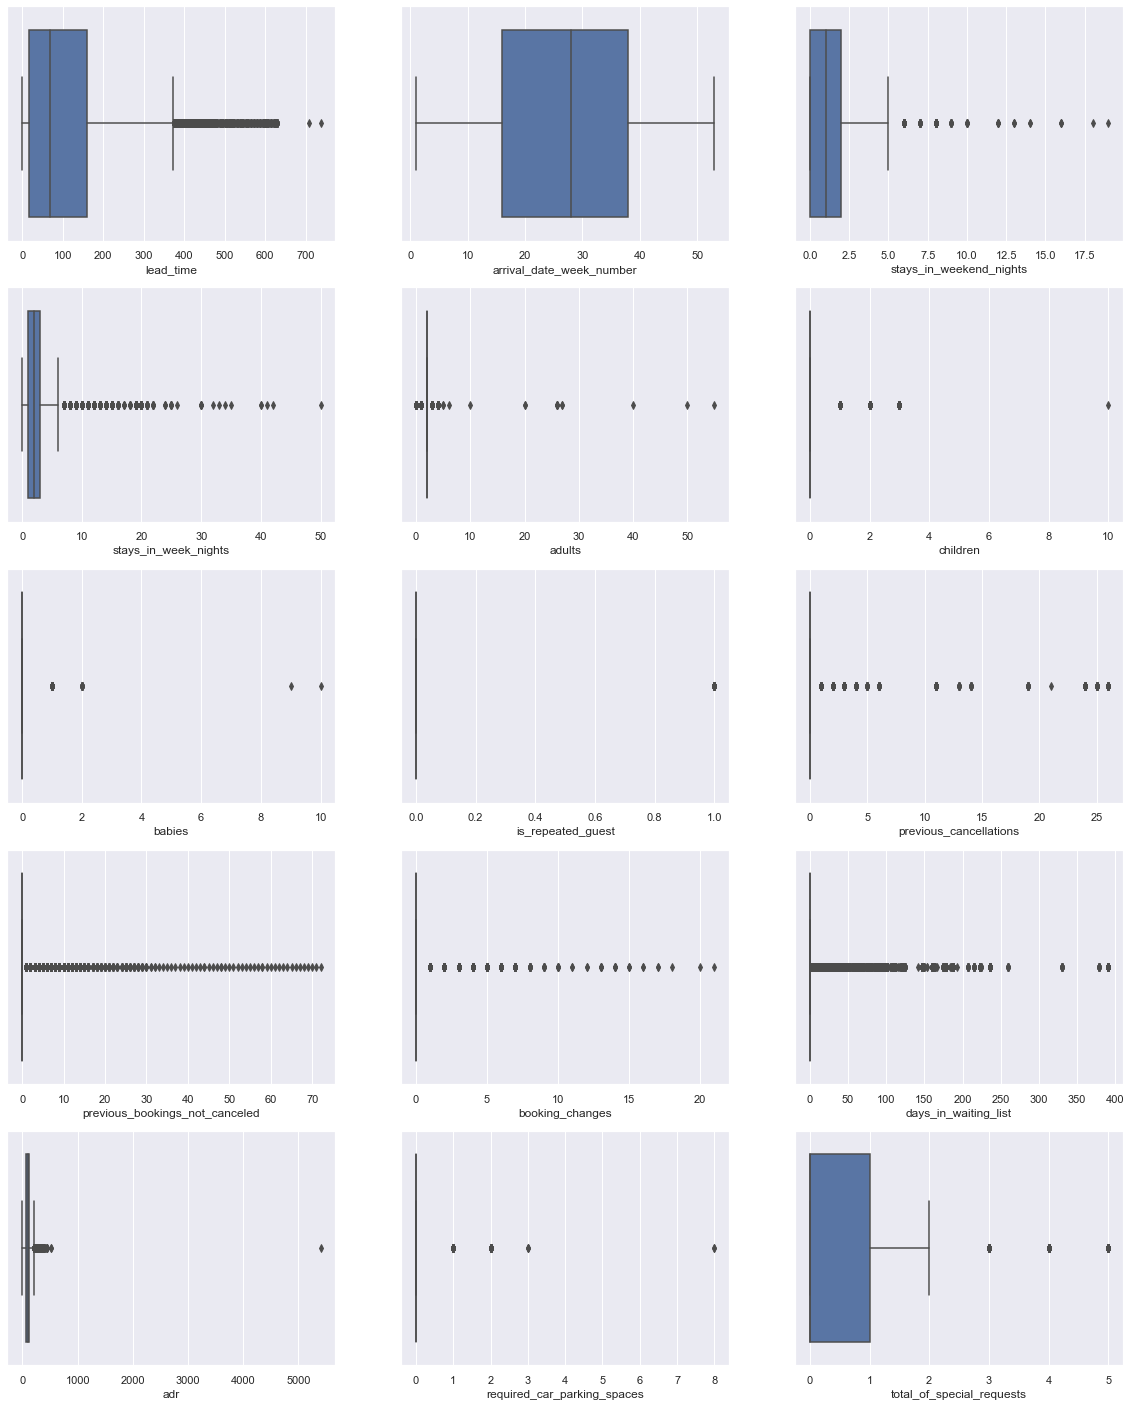

In [122]:
numerical = ['lead_time', 'arrival_date_week_number', 
             'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 
             'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
             'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
             'total_of_special_requests']

# create boxplot to detect outliers
plt.figure(figsize=(20,25))

h=1
columns=df05[numerical].columns.tolist()
for i in columns:   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,h) 
    sns.boxplot(x=i,data=df02)
    h=h+1 #add 1 to go to the next subplot space

#show results
plt.show()


**Findings:**

>1. From the Boxplot results above, only the column 'arrival_date_week_number' has no outlier. All other columns have outliers.
>2. Next, I'll handle the outliers by using 1.5 IQR rule.

#### b) Handle outliers:

The IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

Boxplot uses the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, I'll need to use the mathematical formula and retrieve the outlier data.

For finding out the Outlier using IQR I have to define a multiplier which is 1.5 ideally that will decide how far below Q1 and above Q3 will be considered as an Outlier. Any value below Q1-1.5 *IQR or above Q3+1.5 *IQR is an Outlier

Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [127]:
# codes from https://www.kaggle.com/shrutidandagi/hotel-booking-demand-eda-data-visualisation
# check boundary and outliers
for j in numerical:
    IQR = df05[j].quantile(0.75) - df05[j].quantile(0.25)
    Lower_fence = df05[j].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df05[j].quantile(0.75) + (IQR * 1.5)
    print(j + ' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    

lead_time outliers are values < -195.0 or > 373.0
arrival_date_week_number outliers are values < -17.0 or > 71.0
stays_in_weekend_nights outliers are values < -3.0 or > 5.0
stays_in_week_nights outliers are values < -2.0 or > 6.0
adults outliers are values < 2.0 or > 2.0
children outliers are values < 0.0 or > 0.0
babies outliers are values < 0.0 or > 0.0
is_repeated_guest outliers are values < 0.0 or > 0.0
previous_cancellations outliers are values < 0.0 or > 0.0
previous_bookings_not_canceled outliers are values < 0.0 or > 0.0
booking_changes outliers are values < 0.0 or > 0.0
days_in_waiting_list outliers are values < 0.0 or > 0.0
adr outliers are values < -15.774999999999991 or > 211.065
required_car_parking_spaces outliers are values < 0.0 or > 0.0
total_of_special_requests outliers are values < -1.5 or > 2.5


In [136]:
# Check min and max values of numerical variables
for k in numerical:
    print("the min and max values of " + k + " are {} and {}".format(df05[k].min(), 
                                                                     df05[k].max()))
    

the min and max values of lead_time are 0 and 737
the min and max values of arrival_date_week_number are 1 and 53
the min and max values of stays_in_weekend_nights are 0 and 19
the min and max values of stays_in_week_nights are 0 and 50
the min and max values of adults are 0 and 55
the min and max values of children are 0.0 and 10.0
the min and max values of babies are 0 and 10
the min and max values of is_repeated_guest are 0 and 1
the min and max values of previous_cancellations are 0 and 26
the min and max values of previous_bookings_not_canceled are 0 and 72
the min and max values of booking_changes are 0 and 21
the min and max values of days_in_waiting_list are 0 and 391
the min and max values of adr are -6.38 and 5400.0
the min and max values of required_car_parking_spaces are 0 and 8
the min and max values of total_of_special_requests are 0 and 5


> **How to handle the outliers?**

**lead_time**

'lead_time' is Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

The maximum of 'lead_time' is 737. The upperboundary of 'lead_time' showns above is 373. I'll treat values over 373 as 373. 

**stays_in_weekend_nights**

The maximum of 'stays_in_weekend_nights' is 19. The upperboundary of 'stays_in_weekend_nights' showns above is 5. I'll treat values over 5 as 5. 

**stays_in_week_nights**

The maximum of 'stays_in_week_nights' is 50. The upperboundary of 'stays_in_week_nights' showns above is 6. I'll treat values over 6 as 6. 

**adults**

The maximum of 'adults' is 55. The upperboundary of 'adults' showns above is 2. For this column, I'll convert it as a categorical variable. Less than two adults is 1 and otherwise is 0. 

**children**

The maximum of 'children' is 10. The upperboundary of 'children' showns above is 0. For this column, I'll convert it as a categorical variable. With children is 1 and without children is 0. 

**babies**

The maximum of 'babies' is 10. The upperboundary of 'babies' showns above is 0. For this column, I'll convert it as a categorical variable. With babies is 1 and without babies is 0. 

**is_repeated_guest**

The maximum of 'is_repeated_guest' is 1. The upperboundary of 'is_repeated_guest' showns above is 0. For this column, I'll convert it as a categorical variable. 'is_repeated_guest' is 1 and otherwise is 0. 

**previous_cancellations**

The maximum of 'previous_cancellations' is 26. The upperboundary of 'previous_cancellations' showns above is 0. For this column, I'll convert it as a categorical variable. Having 'previous_cancellations' is 1 and otherwise is 0. 

**previous_bookings_not_canceled**

This column is the same as the last 'previous_cancellations' column after converting. I'll delete this column.

**booking_changes**

The maximum of 'booking_changes' is 21. The upperboundary of 'booking_changes' showns above is 0. For this column, I'll convert it as a categorical variable. Having 'booking_changes' is 1 and otherwise is 0. 

**days_in_waiting_list**

The maximum of 'days_in_waiting_list' is 391. The upperboundary of 'days_in_waiting_list' showns above is 0. For this column, I'll convert it as a categorical variable. Having 'days_in_waiting_list' is 1 and otherwise (=0) is 0. 

**adr**

'adr' is Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

The maximum of 'adr' is 5400. The upperboundary of 'adr' showns above is 211.065. I'll treat values over 211.065 as 211.065. 

**required_car_parking_spaces**

The maximum of 'required_car_parking_spaces' is 8. The upperboundary of 'required_car_parking_spaces' showns above is 0. For this column, I'll convert it as a categorical variable. Having 'required_car_parking_spaces' is 1 and otherwise is 0. 


**total_of_special_requests**

The maximum of 'total_of_special_requests' is 5. The upperboundary of 'total_of_special_requests' showns above is 2.5. I'll treat values over 2.5 as 3 since it is the totle number of requests.  



In [171]:
# handle outliers

df06 = df05.copy()

df06.loc[df06.lead_time > 373,'lead_time']=373

df06.loc[df06.stays_in_weekend_nights > 5,'stays_in_weekend_nights']=5

df06.loc[df06.stays_in_week_nights > 6,'stays_in_week_nights']=6

df06.loc[df06.adults > 0,'adults']=1

df06.loc[df06.children > 0,'children']=1

df06.loc[df06.babies > 0,'babies']=1

df06.loc[df06.is_repeated_guest > 0,'is_repeated_guest']=1

df06.loc[df06.previous_cancellations > 0,'previous_cancellations']=1

df06.loc[df06.booking_changes > 0,'booking_changes']=1

df06.loc[df06.days_in_waiting_list > 0,'days_in_waiting_list']=1

df06.loc[df06.adr > 211.065,'adr']=211.065

df06.loc[df06.required_car_parking_spaces > 0,'required_car_parking_spaces']=1

df06.loc[df06.total_of_special_requests > 2.5,'total_of_special_requests']=3

# remove column 'previous_bookings_not_canceled'
df06 = df06.drop(['previous_bookings_not_canceled'],axis=1)


### 2.5 Convert data type


In [172]:
# convert datatypes to string
df07 = df06.copy()

df07['is_canceled'] = df07['is_canceled'].astype('str')
df07['adults'] = df07['adults'].astype('str')
df07['children'] = df07['children'].astype('str')
df07['babies'] = df07['babies'].astype('str')
df07['is_repeated_guest'] = df07['is_repeated_guest'].astype('str')
df07['previous_cancellations'] = df07['previous_cancellations'].astype('str')
df07['booking_changes'] = df07['booking_changes'].astype('str')
df07['days_in_waiting_list'] = df07['days_in_waiting_list'].astype('str')
df07['required_car_parking_spaces'] = df07['required_car_parking_spaces'].astype('str')


**Check data type:**

In [173]:
# define numerical, categorical, and date data
numerical_columns = []
date_column = []
categorical_columns = []

for i in df07.columns[:]:
    if(df07[i].dtype=='object'):
        categorical_columns.append(i)
    elif (df07[i].dtype=='datetime64[ns]'):
        date_column.append(i)
    else:
        numerical_columns.append(i)

print('***The total number of Numerical variables:',len(numerical_columns))        
print('1. Numerical variables:',numerical_columns)
print('--------------------------')
print('***The total number of Date variables:',len(date_column))
print('2. Date variable:',date_column)
print('--------------------------')
print('****The total number of Categorical variables:',len(categorical_columns))
print('3. Categorical variables:',categorical_columns)

***The total number of Numerical variables: 6
1. Numerical variables: ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'total_of_special_requests']
--------------------------
***The total number of Date variables: 2
2. Date variable: ['reservation_status_date', 'Arrival_Date']
--------------------------
****The total number of Categorical variables: 19
3. Categorical variables: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'reservation_status']


***
## Step 3: Visualize

### 1.  Show relationships between categorical variables and Hotel type

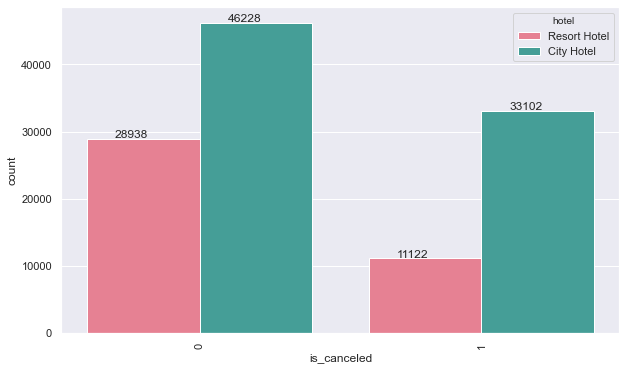

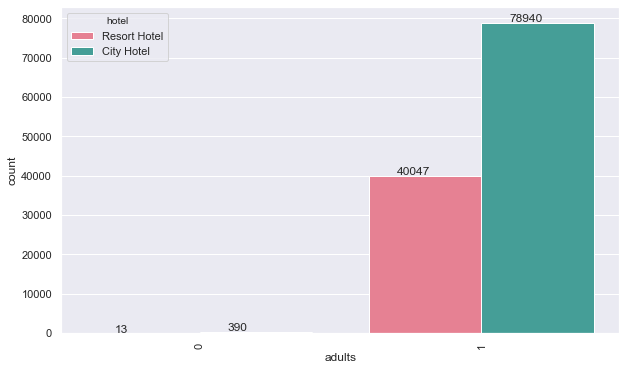

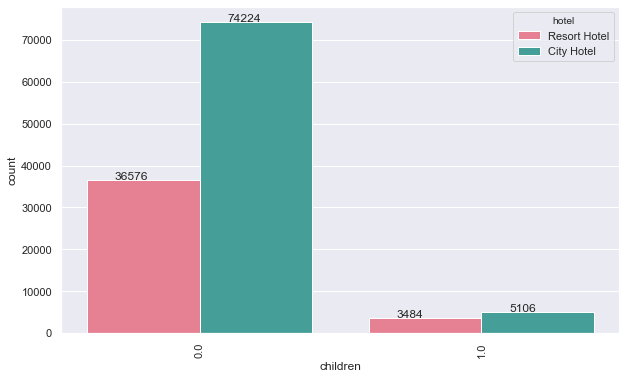

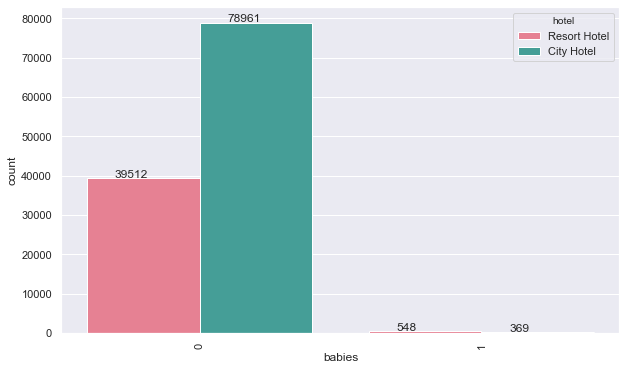

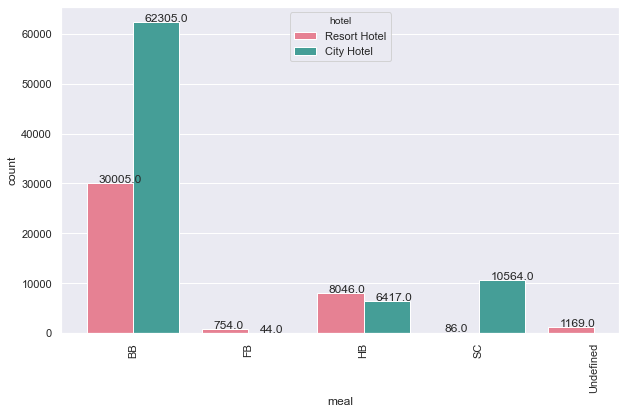

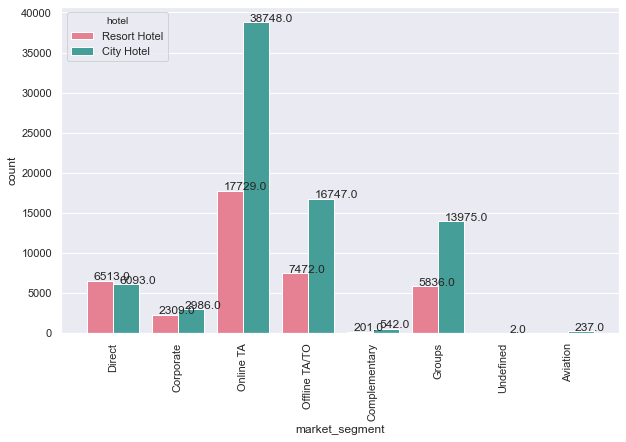

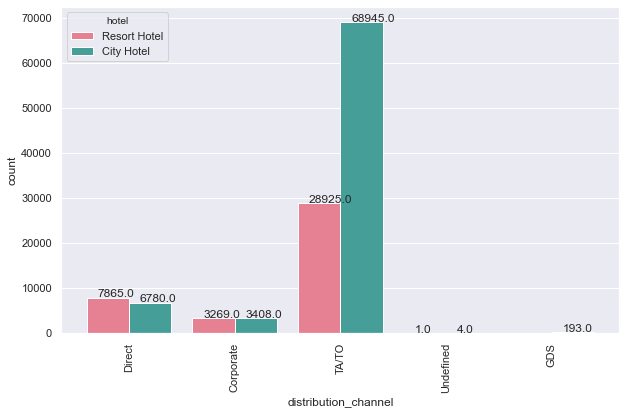

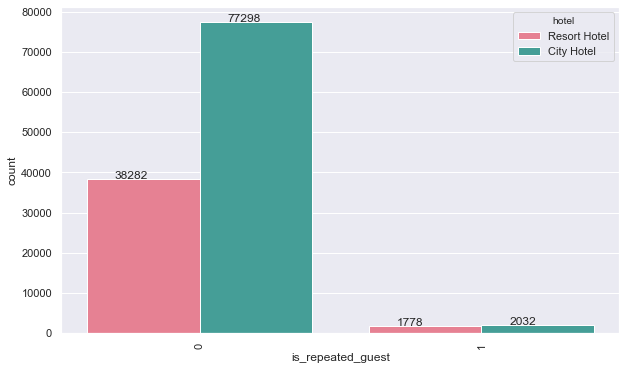

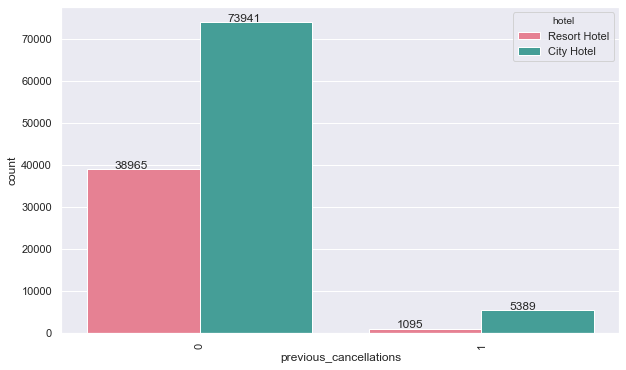

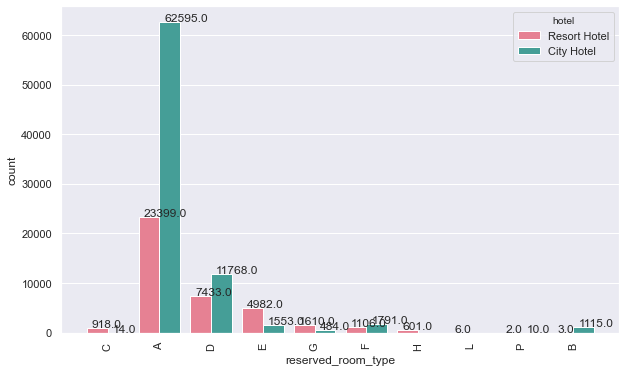

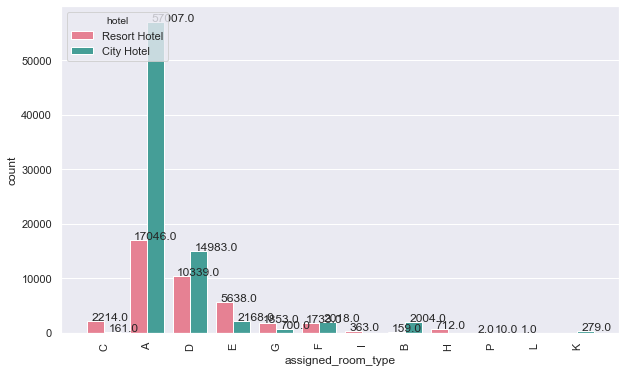

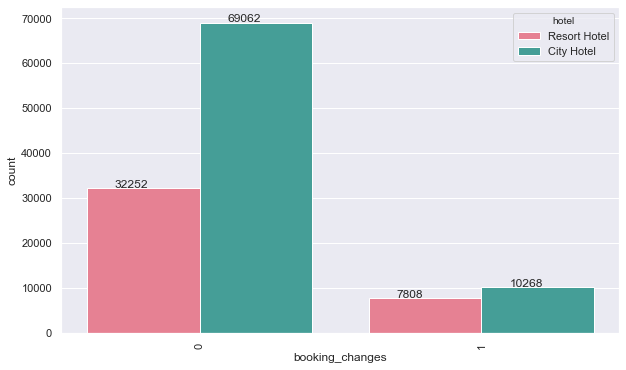

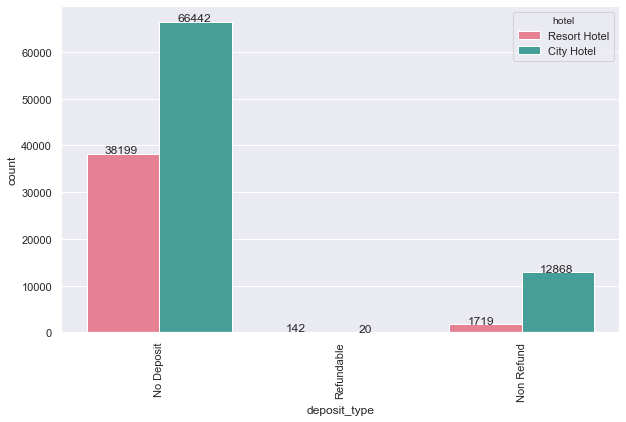

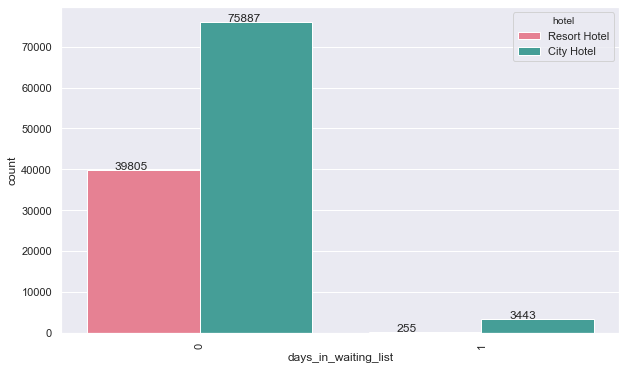

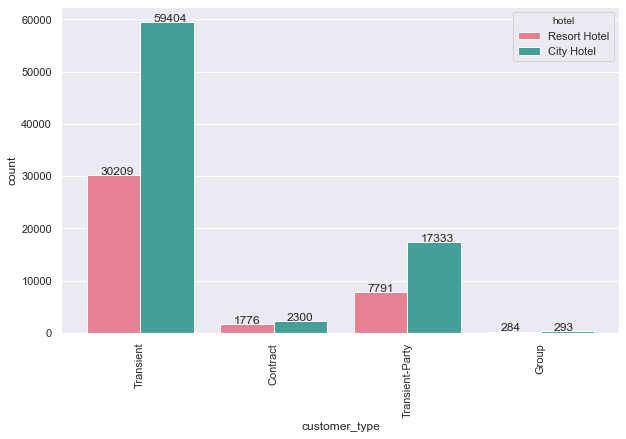

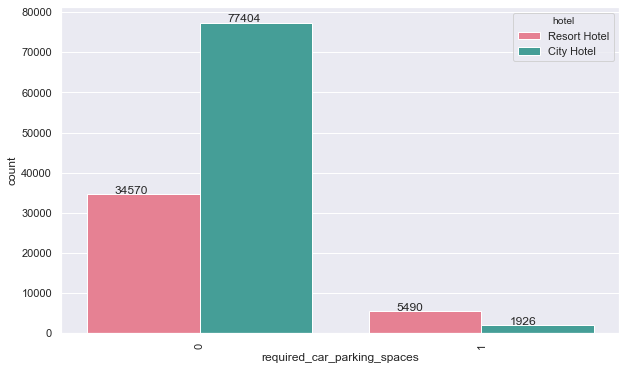

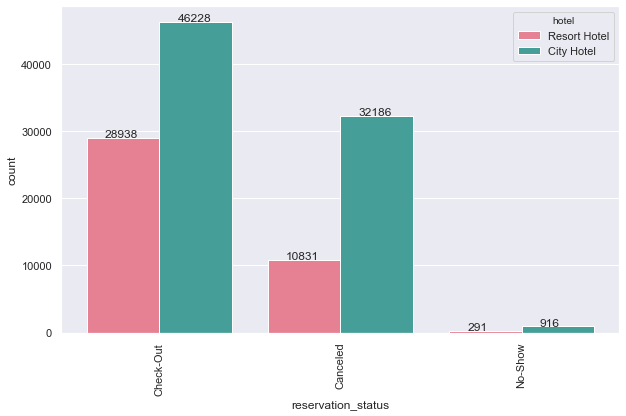

In [174]:
categorical_columns_new = ['is_canceled', 'adults', 
                        'children', 'babies', 'meal', 'market_segment', 
                        'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 
                        'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 
                        'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 
                        'reservation_status']
    
# create the bar chart for categorical variable
for i in categorical_columns_new:
    plt.figure(figsize=(10,6))
    ax=sns.countplot(x=i , hue='hotel', data=df07,palette = 'husl')
    plt.plot()
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+100)) 
        

For cancelation, the city hotel has more cancelation than the resort hotel.

For adults, more choose the city hotel.

For customers with no children and no baby, they would like to choose city hotel.

For meal, at resort hotel, most people chose BB – Bed & Breakfast. And then chose HB – Half board (breakfast and one other meal – usually dinner).

For booking changes, customers of the city hotel are more likely not making any change. 



In [151]:
# reservation by hotel and by country
c_c = pd.crosstab(df07.country, df07.hotel)
c_c['Total'] = c_c['City Hotel']+c_c['Resort Hotel']
c_c.sort_values('Total',ascending = False).head(15)

hotel,City Hotel,Resort Hotel,Total
country,,,
PRT,30960,17630,48590
GBR,5315,6814,12129
FRA,8804,1611,10415
ESP,4611,3957,8568
DEU,6084,1203,7287
ITA,3307,459,3766
IRL,1209,2166,3375
BEL,1894,448,2342
BRA,1794,430,2224


For City hotel, most customers were from PRT and FRA. For resort hotel, most customers were from PRT and GBR.

### 2.  Show relationships between numerical variables and Hotel type

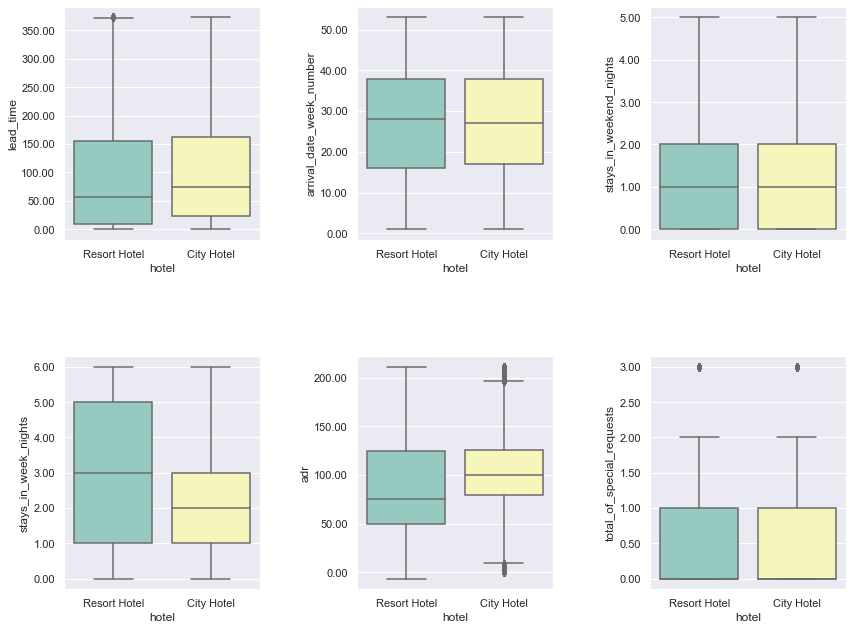

In [158]:
#import FormatStrFormatter from matplotlib library
from matplotlib.ticker import FormatStrFormatter

#BoxPlots for different features.

fig = plt.figure(figsize=(14,30))
for i in range(len(numerical_columns)):
    ax1 = fig.add_subplot(5, 3, i+1)
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    sns.boxplot(x='hotel', y=numerical_columns[i], data=df07,palette="Set3")
    i = i + 1
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
plt.show()

For city hotel, the lead time (Number of days that elapsed between the entering date of the booking into the PMS and the arrival date) and adr (Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights) are higher than those of the resort hotel. 

In [166]:
# reservation by hotel type and reservation_status_date
dd = pd.crosstab(df07.reservation_status_date, df07.hotel)
dd['Total'] = dd['City Hotel']+dd['Resort Hotel']
dd.sort_values('Total',ascending = False).head(15)


hotel,City Hotel,Resort Hotel,Total
reservation_status_date,,,
2015-10-21,1416,45,1461
2015-07-06,763,42,805
2016-11-25,746,44,790
2015-01-01,760,3,763
2016-01-18,553,72,625
2015-07-02,455,14,469
2016-12-07,392,58,450
2015-12-18,402,21,423
2016-02-09,267,145,412


In [167]:
# reservation by hotel type and Arrival_Date
ad = pd.crosstab(df07.Arrival_Date, df07.hotel)
ad['Total'] = ad['City Hotel']+ad['Resort Hotel']
ad.sort_values('Total',ascending = False).head(15)

hotel,City Hotel,Resort Hotel,Total
Arrival_Date,,,
2015-12-05,226,222,448
2016-11-07,320,46,366
2015-10-16,340,16,356
2016-10-13,322,22,344
2015-09-18,311,29,340
2017-06-08,270,67,337
2017-03-02,230,105,335
2016-10-28,264,70,334
2015-09-17,179,152,331
